# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth. Additionally, there seem to be more city closer to Southern Latitudes as opposed to the Northern Ones.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from datetime import date


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
#adjusted latitude to
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#tried this, but came up with duplicates (dead zones w/ not many cities). Code below accounts for dupes
#create random lat_longs
# lat_random = []
# lng_random = []
# loops = 500

# #loop through 500 times, create random lat/longs betweeen possible range
# for x in range(0, loops):
#     lat_random.append(np.random.uniform(min(lat_range), max(lat_range)))
#     lng_random.append(np.random.uniform(min(lng_range), max(lng_range)))

# len(lng_random)

#create list of random cities
# city_list = []

# for x in len:
#     city = citipy.nearest_city(lat_random[x], lng_random[x])
#     city_list.append(city.city_name)

    
# city_df = pd.DataFrame(city_list)
# city_df.columns = ['City']
# city_df['City'].value_counts()

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

lat = []
lng = []
temp = []
cloud = []
humidity = []
Max_Temp = []
Wind_Speed = []
country = []
city_list = []

count = 1
set_count = 1

print('Beginning Data Retrieval')     
print('-----------------------------')
      
#Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        Max_Temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        Wind_Speed.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        city_list.append(city)
        print(f'Processing Record {count} of Set {set_count} | {city}')
        if count >50:
            count = 1
            set_count = set_count + 1
        else:
            count = count + 1
    except KeyError:
        print ('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

# response = requests.get(query_url + 'Chicago').json()
# response['main']

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cap-aux-meules
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | trat
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | rundu
Processing Record 12 of Set 1 | san cristobal
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | amudat
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | konosha
Processing Record 22 of Set 1 | hualmay
Processing Record 23 of Set 1 | vaini
Processing Record 2

Processing Record 33 of Set 4 | okha
City not found. Skipping...
Processing Record 34 of Set 4 | yulara
Processing Record 35 of Set 4 | mentakab
Processing Record 36 of Set 4 | berlevag
Processing Record 37 of Set 4 | usogorsk
Processing Record 38 of Set 4 | kavieng
Processing Record 39 of Set 4 | chulym
Processing Record 40 of Set 4 | comodoro rivadavia
Processing Record 41 of Set 4 | santa rosa
Processing Record 42 of Set 4 | luanda
Processing Record 43 of Set 4 | siddipet
Processing Record 44 of Set 4 | coahuayana
Processing Record 45 of Set 4 | ust-maya
Processing Record 46 of Set 4 | nara
Processing Record 47 of Set 4 | cap malheureux
Processing Record 48 of Set 4 | klyuchi
Processing Record 49 of Set 4 | tezu
Processing Record 50 of Set 4 | nadym
City not found. Skipping...
City not found. Skipping...
Processing Record 51 of Set 4 | zholymbet
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | cooma
Processing Record 3 of Set 5 | nome
Processing Record 4 of 

City not found. Skipping...
Processing Record 12 of Set 8 | huarmey
City not found. Skipping...
Processing Record 13 of Set 8 | vardo
City not found. Skipping...
Processing Record 14 of Set 8 | diamantino
Processing Record 15 of Set 8 | ambon
City not found. Skipping...
Processing Record 16 of Set 8 | cabinda
Processing Record 17 of Set 8 | acapulco
Processing Record 18 of Set 8 | kirakira
City not found. Skipping...
Processing Record 19 of Set 8 | tutoia
Processing Record 20 of Set 8 | novyy urengoy
Processing Record 21 of Set 8 | ambulu
Processing Record 22 of Set 8 | pala
Processing Record 23 of Set 8 | sao joao da barra
Processing Record 24 of Set 8 | altay
Processing Record 25 of Set 8 | kargasok
Processing Record 26 of Set 8 | sisimiut
Processing Record 27 of Set 8 | kampot
Processing Record 28 of Set 8 | tabou
Processing Record 29 of Set 8 | crib point
City not found. Skipping...
Processing Record 30 of Set 8 | aksarka
Processing Record 31 of Set 8 | tocopilla
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
summary_df = pd.DataFrame(list(zip(city_list,cloud,country,humidity,lat,lng,Max_Temp,Wind_Speed)),
                          columns=['City','Cloudiness','Country','Humidity','Lat','Lng','Max Temp','Wind Speed'])

summary_df.to_csv(output_data_file)

summary_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cap-aux-meules,75,CA,75,47.38,-61.86,8.00,8.20
1,nikolskoye,90,RU,85,59.70,30.79,1.11,9.00
2,cidreira,48,BR,80,-30.17,-50.22,23.78,0.95
3,puerto ayora,20,EC,66,-0.74,-90.35,30.00,6.20
4,sao filipe,0,CV,95,14.90,-24.50,21.83,7.15


In [14]:
summary_df.dtypes

City           object
Cloudiness      int64
Country        object
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

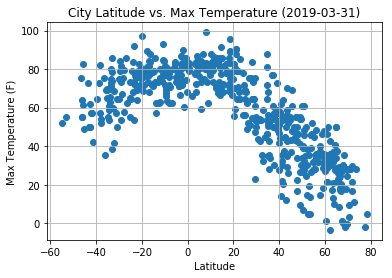

In [15]:
# Build a scatter plot for each data type
plt.scatter(summary_df["Lat"], summary_df["Max Temp"]*(9/5)+32, marker="o")

today = str(date.today())
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

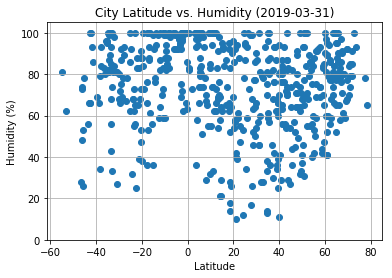

In [16]:
# Build a scatter plot for each data type
plt.scatter(summary_df["Lat"], summary_df["Humidity"], marker="o")

today = str(date.today())
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(0,105)
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

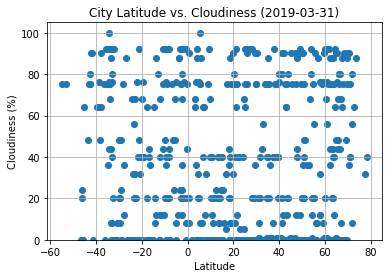

In [17]:
# Build a scatter plot for each data type
plt.scatter(summary_df["Lat"], summary_df["Cloudiness"], marker="o")

today = str(date.today())
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(0,105)
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

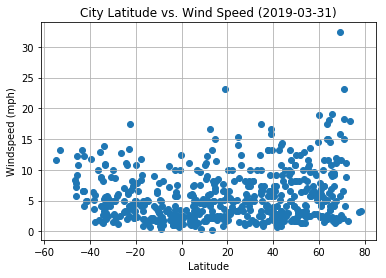

In [18]:
# Build a scatter plot for each data type
plt.scatter(summary_df["Lat"], summary_df["Wind Speed"]/0.621371, marker="o")

today = str(date.today())
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()